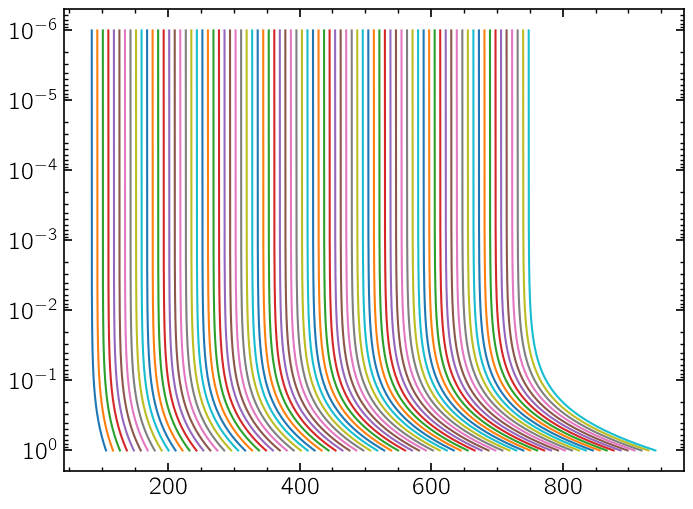

In [1]:
def MakePTProfile(Teq, P):
    return (0.75 * Teq**4 * (P + 2/3))**(1/4)

P = 10**np.linspace(-6,0, 1000)
Teq = np.arange(100,900,10)

%matplotlib inline
for T in Teq:
    plt.plot(MakePTProfile(T, P), P)
plt.gca().set_yscale('log')
plt.gca().invert_yaxis()


In [2]:
from bokeh.plotting import figure, show
from bokeh.models import Legend
from bokeh.palettes import magma   


from virga.justdoit import available, condensation_t
all_gases = available()
gases = ['NH3','H2O','KCl','ZnS']

pressure = P
temperature = MakePTProfile(Teq[3], P)

cond_ts = []
for gas_name in gases: #case sensitive names
    #grab p,t from eddysed
    cond_p,t = condensation_t(gas_name, 1, 2.2)
    cond_ts +=[t]

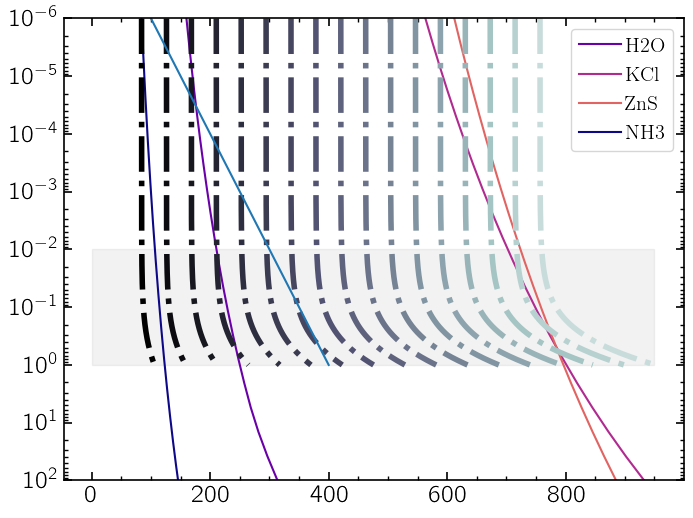

In [3]:
from virga.pvaps import NH3,H2O

temp = np.linspace(10,400,1000)
pvapNH3 = NH3(temp)
#pvapH2O = H2O(temp)

%matplotlib inline
import matplotlib
cmap = matplotlib.cm.get_cmap('plasma')
colors = cmap(np.linspace(0,1,len(gases)+2))
for i in range(1,len(gases)):
    plt.plot(cond_ts[i],cond_p, color=colors[i], label=gases[i])
plt.plot(temp,pvapNH3, color=colors[0], label='NH3')

    
P = 10**np.linspace(-6,0, 1000)
Teq = np.arange(100,950,50)
import matplotlib
cmap = matplotlib.cm.get_cmap('bone')
colors = cmap(np.linspace(0,1,len(Teq)+3))
for i,T in enumerate(Teq):
    temperature = MakePTProfile(T, P)
    plt.plot(temperature,P,ls='-.',lw=4,color=colors[i])
    

plt.plot(temperature,pressure)
plt.gca().set_yscale('log')
plt.gca().invert_yaxis()
plt.ylim(1e2,1e-6)
plt.fill_between(x=np.linspace(0,950), y1=1, y2=0.01, color='grey',  interpolate=True, alpha=.1)
plt.legend(fontsize=15)

In [108]:
P = 10**np.linspace(-6,0, 1000)
Teq = np.arange(10,900,20)

PT_crossed = {}
Where_PT_crossed = {}

temp = np.linspace(10,400,1000)
pvapNH3 = NH3(temp)

for T in Teq:
    pressure = P
    temperature = MakePTProfile(T, P)
    cond_ts = []
    for gas_name in gases[1:]: #case sensitive names
        #grab p,t from eddysed
        cond_p,t = condensation_t(gas_name, 1, 2.2)
        cond_ts +=[t]
        interp_cond_t = np.interp(pressure,cond_p,t)
        diff_curve = interp_cond_t - temperature
        if ((len(diff_curve[diff_curve>0]) > 0) & (len(diff_curve[diff_curve<0]) > 0)):
            PT_crossed.update({T:gas_name})
            inds = np.where(np.isclose(diff_curve, 0 ,rtol = 1e-1, atol = 1e-1))
            Where_PT_crossed.update({T:P[inds]})
            
    interp_cond_t = np.interp(pressure,pvapNH3,temp)
    diff_curve = interp_cond_t - temperature
    if ((len(diff_curve[diff_curve>0]) > 0) & (len(diff_curve[diff_curve<0]) > 0)):
        PT_crossed.update({T:'NH3'})
        inds = np.where(np.isclose(diff_curve, 0 ,rtol = 1e-1, atol = 1e-1))
        Where_PT_crossed.update({T:P[inds]})


In [109]:
PT_crossed, Where_PT_crossed

({110: 'NH3',
  130: 'NH3',
  210: 'H2O',
  230: 'H2O',
  250: 'H2O',
  670: 'KCl',
  690: 'KCl',
  710: 'KCl',
  730: 'ZnS',
  750: 'ZnS',
  770: 'ZnS',
  790: 'ZnS',
  810: 'ZnS',
  830: 'ZnS',
  850: 'ZnS',
  870: 'ZnS'},
 {110: array([5.22056753e-05, 5.29326606e-05, 5.36697695e-05, 5.44171429e-05,
         5.51749238e-05, 5.59432571e-05]),
  130: array([0.03569049, 0.0361875 , 0.03669142, 0.03720237, 0.03772042,
         0.0382457 , 0.03877828, 0.19828839, 0.20104964, 0.20384934,
         0.20668802]),
  210: array([3.95911027e-05, 4.01424249e-05]),
  230: array([0.00079598, 0.00080706]),
  250: array([0.01196956, 0.01213624, 0.50781521]),
  670: array([1.00000000e-06, 1.01392541e-06]),
  690: array([4.33148322e-06]),
  710: array([], dtype=float64),
  730: array([1.26503372e-06, 1.28264983e-06]),
  750: array([6.12049837e-06]),
  770: array([2.92055551e-05]),
  790: array([1.14831241e-04, 6.51349095e-01]),
  810: array([4.70622485e-04, 4.93962174e-01]),
  830: array([0.00175083]),

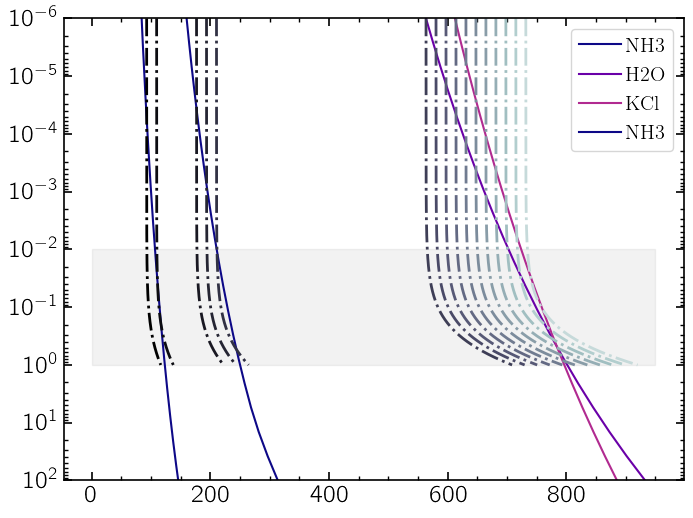

In [96]:
from virga.pvaps import NH3,H2O

temp = np.linspace(10,400,1000)
pvapNH3 = NH3(temp)
#pvapH2O = H2O(temp)

%matplotlib inline
import matplotlib
cmap = matplotlib.cm.get_cmap('plasma')
colors = cmap(np.linspace(0,1,len(gases)+2))
for i in range(len(gases)-1):
    plt.plot(cond_ts[i],cond_p, color=colors[i], label=gases[i])
plt.plot(temp,pvapNH3, color=colors[0], label='NH3')

    
P = 10**np.linspace(-6,0, 1000)
Teq = np.arange(100,950,50)
import matplotlib
cmap = matplotlib.cm.get_cmap('bone')
colors = cmap(np.linspace(0,1,len(PT_crossed.keys())+3))
for i,T in enumerate(PT_crossed.keys()):
    temperature = MakePTProfile(T, P)
    plt.plot(temperature,P,ls='-.',lw=2,color=colors[i])
plt.gca().set_yscale('log')
plt.gca().invert_yaxis()
plt.ylim(1e2,1e-6)
plt.fill_between(x=np.linspace(0,950), y1=1, y2=0.01, color='grey',  interpolate=True, alpha=.1)
plt.legend(fontsize=15)

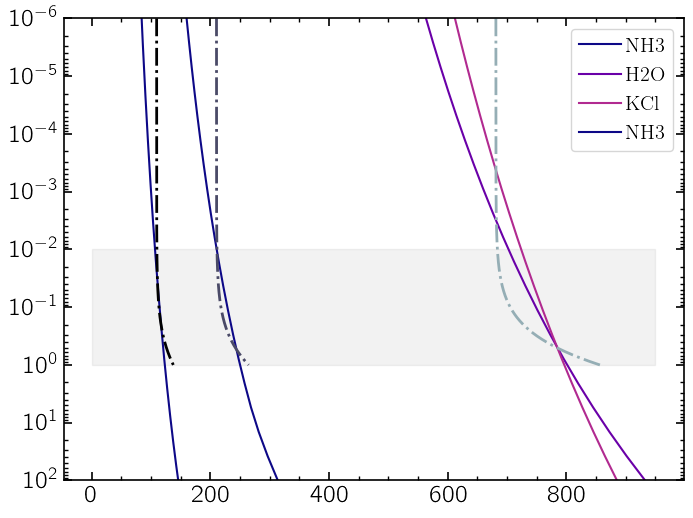

In [111]:
Teq = [130,250,810]

from virga.pvaps import NH3,H2O

temp = np.linspace(10,400,1000)
pvapNH3 = NH3(temp)
#pvapH2O = H2O(temp)

%matplotlib inline
import matplotlib
cmap = matplotlib.cm.get_cmap('plasma')
colors = cmap(np.linspace(0,1,len(gases)+2))
for i in range(len(gases)-1):
    plt.plot(cond_ts[i],cond_p, color=colors[i], label=gases[i])
plt.plot(temp,pvapNH3, color=colors[0], label='NH3')

    
P = 10**np.linspace(-6,0, 1000)

import matplotlib
cmap = matplotlib.cm.get_cmap('bone')
colors = cmap(np.linspace(0,1,len(Teq)+1))
for i,T in enumerate(Teq):
    temperature = MakePTProfile(T, P)
    plt.plot(temperature,P,ls='-.',lw=2,color=colors[i])
plt.gca().set_yscale('log')
plt.gca().invert_yaxis()
plt.ylim(1e2,1e-6)
plt.fill_between(x=np.linspace(0,950), y1=1, y2=0.01, color='grey',  interpolate=True, alpha=.1)
plt.legend(fontsize=15)